Datasets taken from kaggle links below:

https://www.kaggle.com/datasets/udaysankarmukherjee/furniture-image-dataset (For tv and table)

https://www.kaggle.com/datasets/arminajdehnia/antic-chairs (for chair)

https://www.kaggle.com/datasets/sunnykusawa/sofas (for sofa)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import glob


In [2]:
batch_size = 32
img_height = 180
img_width = 180
validation_split = 0.2  # 20% of the data will be used for validation

# Data Augmentation for Training Data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split  # Split the data into training and validation sets
)

# Preprocessing for Validation Data (No Augmentation)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split  # Split the data into training and validation sets
)

# Train Data Generator
train_generator = train_datagen.flow_from_directory(
    'C:/student/AIML/PROJECT/PART B DATASETS',  # this is the directory containing all images
    target_size=(img_height, img_width),  
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify that this is the training set
)

# Validation Data Generator
validation_generator = test_datagen.flow_from_directory(
    'C:/student/AIML/PROJECT/PART B DATASETS',  # Same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 7123 images belonging to 4 classes.
Found 1780 images belonging to 4 classes.


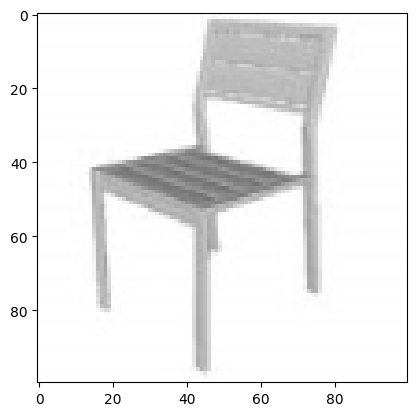

In [3]:
# Display a sample image from the training dataset
img = tf.keras.preprocessing.image.load_img(train_generator.filepaths[0])
plt.imshow(img)
plt.show()

In [4]:
# Class labels
labels = train_generator.class_indices
labels = dict((v, k) for k, v in labels.items())
print("Class labels:", labels)

Class labels: {0: 'Chair_Images', 1: 'Sofa_Images', 2: 'TV_Images', 3: 'Table_Images'}


In [5]:
# Define the CNN model
num_classes = 4  # Coffee Table, Chair, Sofa, TV Console

model = models.Sequential()
model.add(tf.keras.Input(shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0

In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [7]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Adjust the number of epochs as needed
    verbose=1,
)

Epoch 1/10
223/223 [==============================] - 71s 319ms/step - loss: 0.3798 - accuracy: 0.8558 - val_loss: 0.0848 - val_accuracy: 0.9719
Epoch 2/10
223/223 [==============================] - 74s 332ms/step - loss: 0.0677 - accuracy: 0.9792 - val_loss: 0.0427 - val_accuracy: 0.9837
Epoch 3/10
223/223 [==============================] - 73s 326ms/step - loss: 0.0524 - accuracy: 0.9830 - val_loss: 0.0169 - val_accuracy: 0.9966
Epoch 4/10
223/223 [==============================] - 73s 326ms/step - loss: 0.0476 - accuracy: 0.9853 - val_loss: 0.0153 - val_accuracy: 0.9961
Epoch 5/10
223/223 [==============================] - 72s 324ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.0058 - val_accuracy: 0.9989
Epoch 6/10
223/223 [==============================] - 67s 302ms/step - loss: 0.0293 - accuracy: 0.9920 - val_loss: 0.0091 - val_accuracy: 0.9961
Epoch 7/10
223/223 [==============================] - 64s 287ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0196 - val_ac

In [8]:
# Save the final model
model.save("furniture_model_CNN.h5")
print("Saved final model to disk")

Saved final model to disk


In [9]:
# Evaluate the model
scores = model.evaluate(validation_generator, verbose=0)
print("Validation Accuracy: %.2f%%" % (scores[1] * 100))

Validation Accuracy: 99.78%


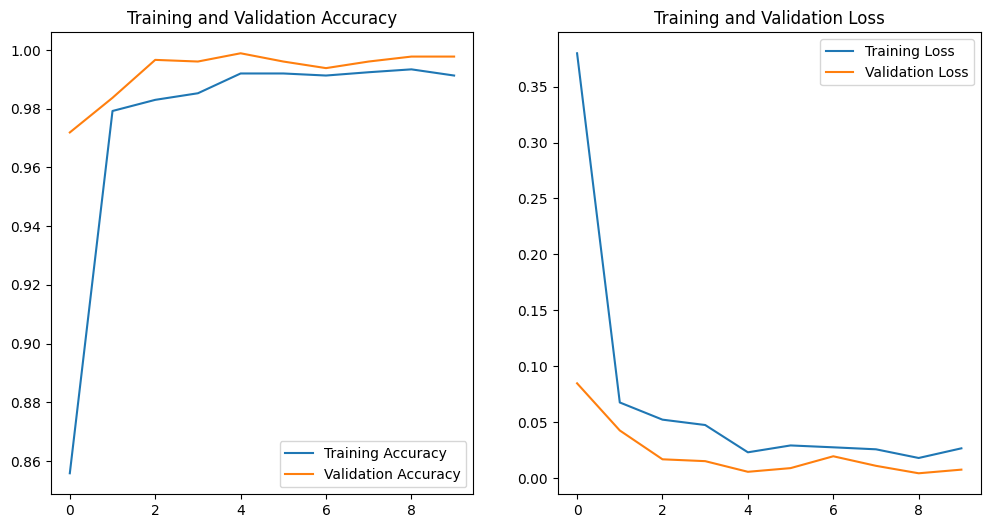

In [10]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()